<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
    Mohammad Mahdi Abootorabi and Roozbeh Pirayadi 

____

# Personal Data

In [4]:
# Set your student number
student_number = '400104964'
Name = 'Aylin'
Last_Name = 'Rasteh'

# Rules
- Make sure that all of your cells can be run perfectly. 

# Q1: Elevator Ride (100 Points)

<font size=4>
Author: Roozbeh Pirayadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Problem Definition

Computer Engineering department has two floors. There are N students and M professors on the first floor, all of whom, want to go from the first floor to the second floor. The only way to move from the first floor to the second one is by using an elevator. 

At most two people can fit in the elevator at the same time. Also, the elevator cannot operate by itself. This means that when the elevator moves up or down, there is either one person in the elevator or there are two people in it. 

But there is a problem. 
If in any of the mentioned floors, there are more students than proffesors, students will start asking questions from the professors. Professors are not willing to answer any question. So none of them wants to be in a floor where the number of students is more than the number of professors. Note that when there is no professor in the floor the number of students is not important. But when there is, the number of students must be less than or equal to the number of professors.

Our goal is to find a schedule for the people to get on the elevator so that this constraint is satisfied.

Below you can see a solution for 4 students and 4 professors

![SegmentLocal](images/result_of_5_3.gif "segment")

Every state in the discussed problem could be represented as a 5-tuple (s1, p1, s2, p2, e). Where s1 is the number of students in the first floor, p1 is the number of professors in the first floor, s2 is the number of students in the second floor and p2 is the number of professors in the second floor. Finally e shows which floor the elevator is.

Our goal is to find a feasible solution. we will do this by starting from the initial state and searching for the final state. Note that there may be more than one way to the final state so the solution is not unique.

## Solution

### Graph

Below is an implementation of a directed weighted graph. You don't need to change anything in this cell. Just take a look at the code, so you could use it.

In [5]:
###########################################
###### no need to change any thing ########
###########################################
class graph:
    def __init__(self):
        self.graph = {}
        self.visited = {}

    # add a new edge between v1 and v2 with weight w or update the weight if edge already exists
    def append(self, v1, v2, w):
        if v1 not in self.graph.keys():
            self.graph[v1] = {}
            self.visited[v1] = 0
        if v2 not in self.graph.keys():
            self.graph[v2] = {}
            self.visited[v2] = 0
        self.graph[v1][v2] = w

    # return adjacency list (used for debugging)
    def reveal(self):
        return self.graph

    # return all vertices in the graph
    def vertex(self):
        return list(self.graph.keys())

    # return all neighbours of a vertix as a list

    def neighbour(self, v):
        return list(self.graph[v].keys())

    # return the weight of a edge

    def weight(self, v1, v2):
        return (self.graph[v1][v2])

    # return the number of vertices

    def order(self):
        return len(self.graph)

    # visit a particular vertex
    def visit(self, v):
        self.visited[v] = 1

    # return the visit status of a particular vertex
    def is_visited(self, vertexid):
        return self.visited[vertexid]

    # return which vertices have been visited
    def get_visited(self):
        return self.visited

    # return degree of a particular vertex
    def degree(self, vertexid):
        return len(self.graph[vertexid])

    # unvisit the whole graph        if whole is True
    # unvisit a particular vertex    if whole is False
    def clear(self, v=None, whole=False):
        if whole:
            self.visited = dict(zip(self.graph.keys(), [0 for i in range(len(self.graph))]))
        elif v is not None:
            self.visited[v] = 0
        else:
            assert False, "arguments must satisfy whole=True or v not None"


#### Building the graph of states

Let's start by a little example and consider a situation where we there are 3 students and 3 professors. Note that your code should be written for the general case using the variables N and M.

In [27]:
# Number of Students
N = 3
# Number of Professors
M = 3

First let's implement a function that receives a 4-tuple (s1, p1, s2, p2) as an input and checks whether this state is a valid one or not. Note that e (position of the elevator) cannot affect the validity of a state so it is not provided as an input.

In [28]:
# validate a state (s1, p1, s2, p2)
# if the constraints are satisfied return true, else return false
def validate(input):

    s1, p1, s2, p2 = input
    if ((s1 > p1) and p1 != 0) or ((s2 > p2) and p2 != 0) or s1 < 0 or p1 < 0 or s2 < 0 or p2 < 0:
        return False
    else:
        return True
    ################################################
    ###### complete this function (10 Points) ######
    ################################################


The below function must build the whole graph. Each scenario is a vertex and v1 is connected to v2 with weight 1 if scenario in v1 could be changed to the scenario in v2 by only one traversal of the elevator.

Hint: you can iterate over different values of s1, p1 and e and determine s2 and p2 using N and M. Then you can check all different actions and use the validate function to determine whether taking this action is possible or not.

In [29]:
# builds the complete graph
def build_graph(N, M):
    G = graph()
    s = [(-1, 0, 1, 0, 1), (-2, 0, 2, 0, 1), (1, 0, -1, 0, -1), (2, 0, -2, 0, -1), (-1, -1, 1, 1, 1), 
         (1, 1, -1, -1, -1), (0, -1, 0, 1, 1), (0, -2, 0, 2, 1), (0, 1, 0, -1, -1), (0, 2, 0, -2, -1)]
    for i in range(N + 1):
        for j in range(M + 1):
            for e in range(1, 3):
                state = (N - i, M - j, i, j, e)
                if validate((state[0], state[1], state[2], state[3])):
                    for k in range(10):
                        if (e == 1 and s[k][4] == 1) or (e == 2 and s[k][4] == -1):
                            newState = (state[0] + s[k][0], state[1] + s[k][1], state[2] + s[k][2], state[3] 
                                        + s[k][3], state[4] + s[k][4])
                            if validate((newState[0], newState[1], newState[2], newState[3])):
                                G.append(state, newState, 1)
#                                 print(state, newState)

    return G

In [30]:
G = build_graph(3, 3)

### Depth First Search

The first algorithm we use to solve the problem is Depth First Search. The function below  executes DFS on G from start until it reaches end. Note that if end is not reachable from start this function returns false and otherwise it returns the found path as a list of states. DFS code is completely and it is used as a baseline to evaulute your A* implementation in the next part.

In [31]:
###########################################
###### no need to change any thing ########
###########################################
# Depth First Search to find the path from start to end
def run_dfs(G, start, end):
    queue = []
    queue.append(start)

    # pred keeps track of how we got to the current vertex
    pred = {}

    while queue:
        current = queue.pop(0)
        G.visit(current)

        smallq = []

        # find children and add to the priority
        for newpos in G.neighbour(current):
            if not G.is_visited(newpos):
                # if the child vertex has already been in queue
                # move it to the frontline of queue
                if newpos in queue:
                    queue.remove(newpos)
                smallq.append(newpos)
                pred[newpos] = current

        queue = smallq+queue

        # traversal ends when the target is met
        if current == end:
            break

    if current != end:
        return False

    # create the path by backtracking
    # trace the predecessor vertex from end to start
    previous = end
    path = []
    while pred:
        path.insert(0, previous)
        if previous == start:
            break
        previous = pred[previous]

    return path


In [32]:
start_vertex = (N, M, 0, 0, 1)
end_vertex = (0, 0, N, M, 2)

In [33]:
###########################################
###### no need to change any thing ########
###########################################
def dfs_result(G, start_vertex, end_vertex):

    dfs_path = run_dfs(G, start_vertex, end_vertex)

    num_of_visited_dfs = 0
    num_of_visited_dfs = len([i for i in G.get_visited() if G.get_visited()[i] == 1])

    G.clear(whole=True)

    if not dfs_path:
        print("end vertex not reachable")
    else:
        print(f'length of the path DFS has found:', len(dfs_path) - 1)

    print(f'number of vertices DFS has traveled:', num_of_visited_dfs)


dfs_result(G, start_vertex, end_vertex)


length of the path DFS has found: 11
number of vertices DFS has traveled: 13


### A* Algorithm

Next we use the A* algorithm. To use A* we need to propose a heuristic function. Propose a non-trivial heuristic function and argue that it is admissible. (10 Points)



<font color='cyan'>

$$
 h((s1, p1, s2, p2, e)) = ?
$$

We consider the heuristic function as (s1 + p1) * 2 - 3 and it is admissible because every time the elevator goes up and down, except for the last time, we can only bring one new person to the second floor.

</font>



In [34]:
def heuristic_func(input):
    s1, p1, s2, p2, e = input
    h = (s1 + p1) * 2 - 3
######################################################
###### implement the func you proposed(5 Points) #####
######################################################
    return h


Like DFS if end is not reachable from start A* must return false and otherwise it must return the found path as a list of states.

In [41]:
# A* to find the path from start to end
#with help of https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/a-star-search-algorithm/
def run_a_star(G, start, end):
    openList = []
    closedList = []
    openList.append(start)
    
    g = {}
    g[start] = 0
        
    parents = {}
    parents[start] = start
    
    while len(openList) > 0:
        current = None
        
        for node in openList:
            if current == None or g[current] + heuristic_func(current) > g[node] + heuristic_func(node):
                current = node;
        
        if current == end:
            G.visit(current)
            previous = end
            path = []
            while parents:
                path.insert(0, previous)
                if previous == start:
                    break
                previous = parents[previous]
            return path
        
        if current == None:
            return None
        
        for neighbour in G.neighbour(current):
            weight = G.weight(current, neighbour)
            if neighbour not in openList and not G.is_visited(neighbour):
                parents[neighbour] = current
                g[neighbour] = g[current] + weight
                openList.append(neighbour)
            else:
                    if g[neighbour] > g[current] + weight:
                        g[neighbour] = g[current] + weight
                        parents[neighbour] = current

                        if G.is_visited(neighbour):
#                             closedList.remove(neighbour)
                            G.clear(v = neighbour)
                            openList.append(neighbour)
        openList.remove(current)
#         closedList.append(current)
        G.visit(current)
    #######################################################
    ######### implement A* algorithm (30 Points) ##########
    #######################################################


In [36]:
###########################################
###### no need to change any thing ########
###########################################
def a_star_result(G, start_vertex, end_vertex):

    a_star_path = run_a_star(G, start_vertex, end_vertex)

    num_of_visited_a_star = 0
    num_of_visited_a_star = len([i for i in G.get_visited() if G.get_visited()[i] == 1])

    G.clear(whole=True)

    if not a_star_path:
        print("end vertex not reachable")
    else:
        print(f'length of the path A* has found:', len(a_star_path) - 1)

    print(f'number of vertices A* has traveled:', num_of_visited_a_star)


a_star_result(G, start_vertex, end_vertex)


length of the path A* has found: 11
number of vertices A* has traveled: 14


## Visualization

The below code creates a gif named "result.gif" which shows the result found by A* algorithm.

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x12d680d30> (for post_execute):


AttributeError: 'ArtistList' object has no attribute 'clear'

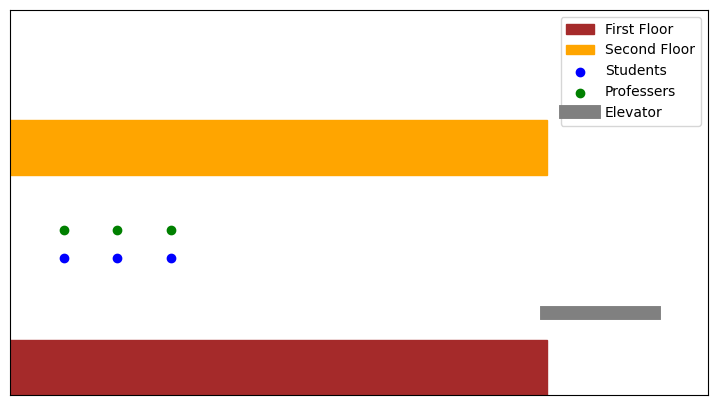

In [37]:
import drawer
drawer.create_gif(run_a_star(G, start_vertex, end_vertex))
G.clear(whole=True)

## Results

Now results of DFS and A* could be compared. Run the code below and explain the result. (10 Points)

In [42]:
N = 100
M = 140

start_vertex = (N, M, 0, 0, 1)
end_vertex = (0, 0, N, M, 2)

G = build_graph(N, M)

dfs_result(G, start_vertex, end_vertex)
a_star_result(G, start_vertex, end_vertex)


length of the path DFS has found: 477
number of vertices DFS has traveled: 673
length of the path A* has found: 477
number of vertices A* has traveled: 8480


<font color='cyan'>

In this example length of the path DFS has found, is equal to the length of the path A* has found but DFS performance depends on how we add nodes in the graph and it does not guarantee that our answer is optimal. Algorithm A* may also take a longer time to reach the solution.
</font>

Cell below runs some tests on dfs and stores the results in "student_number.txt". Then run the cell and upload the result on Quera.

In [23]:
tests = [(100, 140), (200, 260), (600, 610), (800, 1000)]

f = open(student_number + ".txt", "w")


def run_tests():
    for test in tests:
        N, M = test
        G = graph()
        start_vertex = (N, M, 0, 0, 1)
        end_vertex = (0, 0, N, M, 2)

        G = build_graph(N, M)

        f.write(str(run_a_star(G, start_vertex, end_vertex)))
        G.clear(whole=True)

    f.close()


run_tests()
